In [1]:
#initial imports
import pandas as pd
import glob
import os
import numpy as np
import datetime as dt

## Getting familiar with the Crypto datasets

In [2]:
#list all crypto csv files only in directory
#taken from https://medium.com/@stella96joshua/how-to-combine-multiple-csv-files-using-python-for-your-analysis-a88017c6ff9e
file_list = glob.glob("..\Data\Crypto\*.{}".format("csv"))
file_list

['..\\Data\\Crypto\\ADA_data.csv',
 '..\\Data\\Crypto\\BNB_data.csv',
 '..\\Data\\Crypto\\BTC_data.csv',
 '..\\Data\\Crypto\\DOGE_data.csv',
 '..\\Data\\Crypto\\ETH_data.csv']

In [3]:
#appending a column for crypto names in new dataframe to later differentiate them all in the master file
ada = pd.read_csv("..\Data\Crypto\ADA_data.csv")
ada["Name"] = "Cardano"
ada

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,"Dec 31, 2022",0.245577,0.251686,0.244431,0.246466,0.246466,"144,122,815",Cardano
1,"Dec 30, 2022",0.244126,0.245987,0.240350,0.245557,0.245557,"159,952,057",Cardano
2,"Dec 29, 2022",0.248380,0.248460,0.241094,0.244140,0.244140,"214,425,739",Cardano
3,"Dec 28, 2022",0.260384,0.260842,0.247964,0.248378,0.248378,"209,596,269",Cardano
4,"Dec 27, 2022",0.265306,0.265969,0.257486,0.260370,0.260370,"164,331,309",Cardano
...,...,...,...,...,...,...,...,...
1821,"Jan 05, 2018",1.171150,1.252420,0.903503,0.999559,0.999559,"508,100,000",Cardano
1822,"Jan 04, 2018",1.094030,1.327210,1.037650,1.114120,1.114120,"593,430,016",Cardano
1823,"Jan 03, 2018",0.779681,1.085670,0.778578,1.079660,1.079660,"657,398,016",Cardano
1824,"Jan 02, 2018",0.724676,0.794646,0.697856,0.782587,0.782587,"289,712,000",Cardano


In [4]:
bnb = pd.read_csv("..\Data\Crypto\BNB_data.csv")
bnb["Name"] = "Binance"
bnb

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,"Dec 31, 2022",245.79,247.58,245.11,246.35,246.35,"307,551,853",Binance
1,"Dec 30, 2022",246.46,246.50,243.13,245.78,245.78,"342,300,809",Binance
2,"Dec 29, 2022",244.17,246.60,243.58,246.48,246.48,"345,312,528",Binance
3,"Dec 28, 2022",246.61,246.84,242.11,244.14,244.14,"414,698,978",Binance
4,"Dec 27, 2022",244.20,247.68,242.56,246.60,246.60,"391,342,277",Binance
...,...,...,...,...,...,...,...,...
1821,"Jan 05, 2018",9.15,16.72,9.09,14.92,14.92,"341,504,992",Binance
1822,"Jan 04, 2018",9.45,9.54,8.85,9.21,9.21,"158,819,008",Binance
1823,"Jan 03, 2018",8.77,9.58,8.53,9.54,9.54,"108,852,000",Binance
1824,"Jan 02, 2018",8.46,9.12,8.22,8.84,8.84,"104,789,000",Binance


In [5]:
btc = pd.read_csv("..\Data\Crypto\BTC_data.csv")
btc["Name"] = "Bitcoin"
btc

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,31-Dec-22,16603.67,16628.99,16517.52,16547.50,16547.50,"11,239,186,456",Bitcoin
1,30-Dec-22,16641.33,16643.43,16408.47,16602.59,16602.59,"15,929,162,910",Bitcoin
2,29-Dec-22,16552.32,16651.76,16508.68,16642.34,16642.34,"14,472,237,479",Bitcoin
3,28-Dec-22,16716.40,16768.17,16497.56,16552.57,16552.57,"17,005,713,920",Bitcoin
4,27-Dec-22,16919.29,16959.85,16642.07,16717.17,16717.17,"15,748,580,239",Bitcoin
...,...,...,...,...,...,...,...,...
1821,05-Jan-18,15477.20,17705.20,15202.80,17429.50,17429.50,"23,840,899,072",Bitcoin
1822,04-Jan-18,15270.70,15739.70,14522.20,15599.20,15599.20,"21,783,199,744",Bitcoin
1823,03-Jan-18,14978.20,15572.80,14844.50,15201.00,15201.00,"16,871,900,160",Bitcoin
1824,02-Jan-18,13625.00,15444.60,13163.60,14982.10,14982.10,"16,846,600,192",Bitcoin


In [6]:
doge = pd.read_csv("..\Data\Crypto\DOGE_data.csv")
doge["Name"] = "Dogecoin"
doge

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,"Dec 31, 2022",0.068394,0.071109,0.068162,0.070294,0.070294,"289,371,049",Dogecoin
1,"Dec 30, 2022",0.071032,0.071308,0.066953,0.068404,0.068404,"419,889,739",Dogecoin
2,"Dec 29, 2022",0.070380,0.071302,0.069771,0.071042,0.071042,"285,144,119",Dogecoin
3,"Dec 28, 2022",0.073727,0.073821,0.070052,0.070381,0.070381,"496,350,491",Dogecoin
4,"Dec 27, 2022",0.075763,0.076022,0.073131,0.073724,0.073724,"290,428,818",Dogecoin
...,...,...,...,...,...,...,...,...
1821,"Jan 05, 2018",0.009660,0.012283,0.009589,0.012167,0.012167,"212,383,008",Dogecoin
1822,"Jan 04, 2018",0.009346,0.010036,0.008768,0.009644,0.009644,"108,986,000",Dogecoin
1823,"Jan 03, 2018",0.009088,0.009584,0.008882,0.009320,0.009320,"66,349,900",Dogecoin
1824,"Jan 02, 2018",0.008873,0.009598,0.008551,0.009145,0.009145,"89,424,096",Dogecoin


In [7]:
eth = pd.read_csv("..\Data\Crypto\ETH_data.csv")
eth["Name"] = "Ethereum"
eth

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,"Dec 31, 2022","1,199.36","1,205.09","1,194.20","1,196.77","1,196.77","3,018,513,333",Ethereum
1,"Dec 30, 2022","1,201.57","1,202.03","1,187.46","1,199.23","1,199.23","4,055,668,253",Ethereum
2,"Dec 29, 2022","1,190.01","1,204.14","1,188.36","1,201.60","1,201.60","4,132,233,940",Ethereum
3,"Dec 28, 2022","1,212.74","1,213.13","1,185.70","1,189.99","1,189.99","4,991,669,631",Ethereum
4,"Dec 27, 2022","1,226.99","1,230.42","1,205.90","1,212.79","1,212.79","4,091,530,737",Ethereum
...,...,...,...,...,...,...,...,...
1821,"Jan 05, 2018",975.75,"1,075.39",956.33,997.72,997.72,"6,683,149,824",Ethereum
1822,"Jan 04, 2018",961.71,"1,045.08",946.09,980.92,980.92,"6,502,859,776",Ethereum
1823,"Jan 03, 2018",886.00,974.47,868.45,962.72,962.72,"5,093,159,936",Ethereum
1824,"Jan 02, 2018",772.35,914.83,772.35,884.44,884.44,"5,783,349,760",Ethereum


In [8]:
#append all 5 crypto csvs into one master csv
crypto_df = pd.concat([ada,bnb,btc,doge,eth])
crypto_df

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,"Dec 31, 2022",0.245577,0.251686,0.244431,0.246466,0.246466,"144,122,815",Cardano
1,"Dec 30, 2022",0.244126,0.245987,0.24035,0.245557,0.245557,"159,952,057",Cardano
2,"Dec 29, 2022",0.24838,0.24846,0.241094,0.24414,0.24414,"214,425,739",Cardano
3,"Dec 28, 2022",0.260384,0.260842,0.247964,0.248378,0.248378,"209,596,269",Cardano
4,"Dec 27, 2022",0.265306,0.265969,0.257486,0.26037,0.26037,"164,331,309",Cardano
...,...,...,...,...,...,...,...,...
1821,"Jan 05, 2018",975.75,"1,075.39",956.33,997.72,997.72,"6,683,149,824",Ethereum
1822,"Jan 04, 2018",961.71,"1,045.08",946.09,980.92,980.92,"6,502,859,776",Ethereum
1823,"Jan 03, 2018",886.00,974.47,868.45,962.72,962.72,"5,093,159,936",Ethereum
1824,"Jan 02, 2018",772.35,914.83,772.35,884.44,884.44,"5,783,349,760",Ethereum


In [9]:
#check data types of cols in dataframe
crypto_df.dtypes

Date         object
Open         object
High         object
Low          object
Close        object
Adj Close    object
Volume       object
Name         object
dtype: object

In [10]:
#convert date column to datetime data type
crypto_df["Date"] = pd.to_datetime(crypto_df["Date"])

#convert open, high, low, close, adj close columns to float
cols = ["Open", "High", "Low", "Close", "Adj Close"]
crypto_df[cols] = crypto_df[cols].apply(pd.to_numeric, errors = "coerce")
crypto_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume               object
Name                 object
dtype: object

In [11]:
#renaming column Adj_Close
crypto_df = crypto_df.rename(columns = {
    "Adj Close" : "Adj_Close"})
crypto_df

,Date,Open,High,Low,Close,Adj_Close,Volume,Name
0,2022-12-31,0.245577,0.251686,0.244431,0.246466,0.246466,"144,122,815",Cardano
1,2022-12-30,0.244126,0.245987,0.240350,0.245557,0.245557,"159,952,057",Cardano
2,2022-12-29,0.248380,0.248460,0.241094,0.244140,0.244140,"214,425,739",Cardano
3,2022-12-28,0.260384,0.260842,0.247964,0.248378,0.248378,"209,596,269",Cardano
4,2022-12-27,0.265306,0.265969,0.257486,0.260370,0.260370,"164,331,309",Cardano
...,...,...,...,...,...,...,...,...
1821,2018-01-05,975.750000,NaN,956.330000,997.720000,997.720000,"6,683,149,824",Ethereum
1822,2018-01-04,961.710000,NaN,946.090000,980.920000,980.920000,"6,502,859,776",Ethereum
1823,2018-01-03,886.000000,974.470000,868.450000,962.720000,962.720000,"5,093,159,936",Ethereum
1824,2018-01-02,772.350000,914.830000,772.350000,884.440000,884.440000,"5,783,349,760",Ethereum


In [12]:
#quick description of all cryptos
crypto_df.groupby("Name").describe()

Open                                                        \
           count          mean           std          min          25%   
Name                                                                     
Binance   1826.0    150.890663    183.925657     4.530000    14.820000   
Bitcoin   1826.0  20339.679496  16990.993283  3236.270000  7686.925000   
Cardano   1826.0      0.498833      0.630367     0.023954     0.064931   
Dogecoin  1826.0      0.062388      0.099214     0.001540     0.002606   
Ethereum  1075.0    306.960130    196.462213    84.280000   170.795000   

                                                      High                ...  \
                   50%           75%           max   count          mean  ...   
Name                                                                      ...   
Binance      27.470000    296.440000    676.320000  1826.0    155.907662  ...   
Bitcoin   10966.995000  33789.307500  67549.730000  1826.0  20839.385575  ...   
Cardano       0.160197      0.790227      2.966390  1826.0      0.519724  ...   
Dogecoin      0.003892      0.082460      0.687801  1826.0      0.066003  ...   
Ethereum    226.660000    395.790000    995.150000  1068.0    311.552294  ...   

                 Close               Adj_Close                              \
                   75%           max     count          mean           std   
Name                                                                         
Binance     296.412500    675.680000    1826.0    150.989074    183.832094   
Bitcoin   33740.257500  67566.830000    1826.0  20338.668680  16986.017627   
Cardano       0.790289      2.968239    1826.0      0.498572      0.630455   
Dogecoin      0.082357      0.684777    1826.0      0.062432      0.099268   
Ethereum    395.862500    997.720000    1074.0    306.514069    196.073348   

                                                                              
                  min          25%           50%           75%           max  
Name                                                                          
Binance      4.530000    14.835000     27.455000    296.412500    675.680000  
Bitcoin   3236.760000  7682.072500  10960.590000  33740.257500  67566.830000  
Cardano      0.023961     0.064918      0.159863      0.790289      2.968239  
Dogecoin     0.001537     0.002607      0.003889      0.082357      0.684777  
Ethereum    84.310000   170.830000    226.660000    395.862500    997.720000  

[5 rows x 40 columns]

In [13]:
#export the master crypto file
crypto_df.to_csv("..\Data\crypto_data.csv", index=False)

## Getting familiar with the S&P 500 dataset

In [14]:
#get snapshot of s&p500 dataset
sp500_df = pd.read_csv("..\Data\sp500_data.csv")
sp500_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,30-Dec-22,3829.06,3839.85,3800.34,3839.50,3839.50,"2,979,870,000"
1,29-Dec-22,3805.45,3858.19,3805.45,3849.28,3849.28,"3,003,680,000"
2,28-Dec-22,3829.56,3848.32,3780.78,3783.22,3783.22,"3,083,520,000"
3,27-Dec-22,3843.34,3846.65,3813.22,3829.25,3829.25,"3,030,300,000"
4,23-Dec-22,3815.11,3845.80,3797.01,3844.82,3844.82,"2,819,280,000"
...,...,...,...,...,...,...,...
1254,08-Jan-18,2742.67,2748.51,2737.60,2747.71,2747.71,"3,246,160,000"
1255,05-Jan-18,2731.33,2743.45,2727.92,2743.15,2743.15,"3,239,280,000"
1256,04-Jan-18,2719.31,2729.29,2719.07,2723.99,2723.99,"3,697,340,000"
1257,03-Jan-18,2697.85,2714.37,2697.77,2713.06,2713.06,"3,544,030,000"


In [15]:
#get the datatypes
sp500_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume        object
dtype: object

In [16]:
#appending stock name column to standardize with crypto csv
sp500_df["Name"] = "S&P500"
sp500_df

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,30-Dec-22,3829.06,3839.85,3800.34,3839.50,3839.50,"2,979,870,000",S&P500
1,29-Dec-22,3805.45,3858.19,3805.45,3849.28,3849.28,"3,003,680,000",S&P500
2,28-Dec-22,3829.56,3848.32,3780.78,3783.22,3783.22,"3,083,520,000",S&P500
3,27-Dec-22,3843.34,3846.65,3813.22,3829.25,3829.25,"3,030,300,000",S&P500
4,23-Dec-22,3815.11,3845.80,3797.01,3844.82,3844.82,"2,819,280,000",S&P500
...,...,...,...,...,...,...,...,...
1254,08-Jan-18,2742.67,2748.51,2737.60,2747.71,2747.71,"3,246,160,000",S&P500
1255,05-Jan-18,2731.33,2743.45,2727.92,2743.15,2743.15,"3,239,280,000",S&P500
1256,04-Jan-18,2719.31,2729.29,2719.07,2723.99,2723.99,"3,697,340,000",S&P500
1257,03-Jan-18,2697.85,2714.37,2697.77,2713.06,2713.06,"3,544,030,000",S&P500


In [17]:
#convert date column to datetime data type
sp500_df["Date"] = pd.to_datetime(sp500_df["Date"])
sp500_df

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2022-12-30,3829.06,3839.85,3800.34,3839.50,3839.50,"2,979,870,000",S&P500
1,2022-12-29,3805.45,3858.19,3805.45,3849.28,3849.28,"3,003,680,000",S&P500
2,2022-12-28,3829.56,3848.32,3780.78,3783.22,3783.22,"3,083,520,000",S&P500
3,2022-12-27,3843.34,3846.65,3813.22,3829.25,3829.25,"3,030,300,000",S&P500
4,2022-12-23,3815.11,3845.80,3797.01,3844.82,3844.82,"2,819,280,000",S&P500
...,...,...,...,...,...,...,...,...
1254,2018-01-08,2742.67,2748.51,2737.60,2747.71,2747.71,"3,246,160,000",S&P500
1255,2018-01-05,2731.33,2743.45,2727.92,2743.15,2743.15,"3,239,280,000",S&P500
1256,2018-01-04,2719.31,2729.29,2719.07,2723.99,2723.99,"3,697,340,000",S&P500
1257,2018-01-03,2697.85,2714.37,2697.77,2713.06,2713.06,"3,544,030,000",S&P500


In [18]:
#no need for this part of code
#sp500_df[cols] = sp500_df[cols].apply(pd.to_numeric, errors = "coerce")
#sp500_df.dtypes

In [19]:
#renaming Adj Close col to Adj_Close (for database naming reasons)
sp500_df = sp500_df.rename(columns = {
    "Adj Close" : "Adj_Close" 
})
sp500_df

,Date,Open,High,Low,Close,Adj_Close,Volume,Name
0,2022-12-30,3829.06,3839.85,3800.34,3839.50,3839.50,"2,979,870,000",S&P500
1,2022-12-29,3805.45,3858.19,3805.45,3849.28,3849.28,"3,003,680,000",S&P500
2,2022-12-28,3829.56,3848.32,3780.78,3783.22,3783.22,"3,083,520,000",S&P500
3,2022-12-27,3843.34,3846.65,3813.22,3829.25,3829.25,"3,030,300,000",S&P500
4,2022-12-23,3815.11,3845.80,3797.01,3844.82,3844.82,"2,819,280,000",S&P500
...,...,...,...,...,...,...,...,...
1254,2018-01-08,2742.67,2748.51,2737.60,2747.71,2747.71,"3,246,160,000",S&P500
1255,2018-01-05,2731.33,2743.45,2727.92,2743.15,2743.15,"3,239,280,000",S&P500
1256,2018-01-04,2719.31,2729.29,2719.07,2723.99,2723.99,"3,697,340,000",S&P500
1257,2018-01-03,2697.85,2714.37,2697.77,2713.06,2713.06,"3,544,030,000",S&P500


In [20]:
#check if Date col's datatype has indeed been changed to datetime format
sp500_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj_Close           float64
Volume               object
Name                 object
dtype: object

In [21]:
#quick description of the dataset
sp500_df.describe()

,Open,High,Low,Close,Adj_Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,3449.673415,3470.866060,3426.301168,3449.724766,3449.724766
std,668.795604,672.278346,665.154072,668.903627,668.903627
min,2290.710000,2300.730000,2191.860000,2237.400000,2237.400000
25%,2842.390000,2857.675000,2825.450000,2844.115000,2844.115000
50%,3280.610000,3288.130000,3253.220000,3276.020000,3276.020000
75%,4038.645000,4077.880000,3995.845000,4028.935000,4028.935000
max,4804.510000,4818.620000,4780.040000,4796.560000,4796.560000


In [22]:
#export as cleaned CSV
sp500_df.to_csv("..\Data\sp500_data-cleaned.csv", index = False)

## Some initial visualizations of the datasets

In [23]:
#importing libraries for charts and vizualizations of both dataframes
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

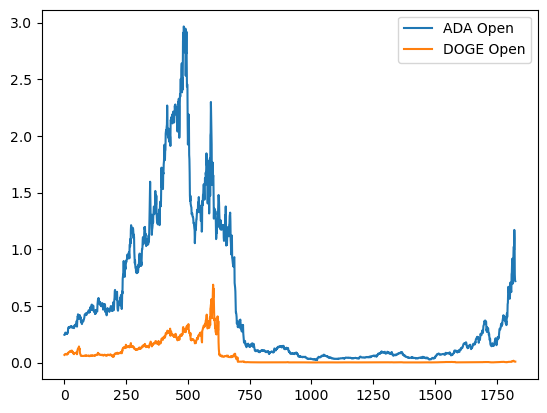

In [24]:
#some exploratory work & viz using the datasets

#ADA & DOGE COINS
fig, ax = plt.subplots()

ax.plot(ada["Open"], label = "ADA Open")
ax.plot(doge["Open"], label = "DOGE Open")
leg = ax.legend()